In [33]:
import pandas as pd

In [34]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [35]:
from matplotlib import pyplot

In [36]:
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [38]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\Sales_SES - Python.csv',sep=';')

In [39]:
df

,Date,Sales
0,1/1/1990,200.0
1,1/2/1990,135.0
2,1/3/1990,195.0
3,1/4/1990,197.5
4,1/5/1990,310.0
5,1/6/1990,175.0
6,1/7/1990,155.0
7,1/8/1990,130.0
8,1/9/1990,220.0
9,1/10/1990,277.5


<AxesSubplot:xlabel='Date'>

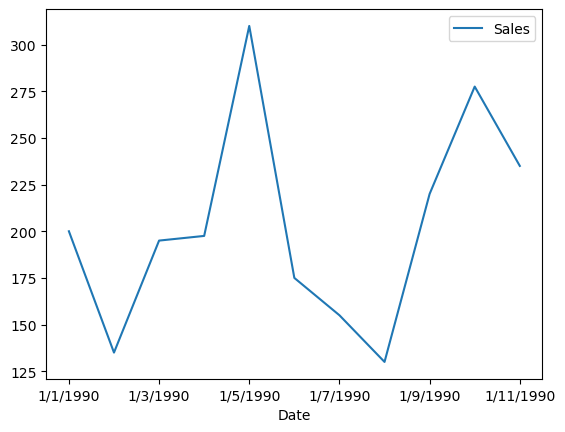

In [40]:
df=df.set_index("Date")
df.plot()

In [41]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)
train_df

,Sales
Date,
1/1/1990,200.0
1/2/1990,135.0
1/3/1990,195.0
1/4/1990,197.5
1/5/1990,310.0
1/6/1990,175.0
1/7/1990,155.0
1/8/1990,130.0


In [42]:
model = SimpleExpSmoothing(train_df,initialization_method='estimated').fit(smoothing_level=0.1,optimized=False)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,8
Model:,SimpleExpSmoothing,SSE,25489.392
Optimized:,False,AIC,68.533
Trend:,None,BIC,68.691
Seasonal:,None,AICC,81.866
Seasonal Periods:,None,Date:,"Sat, 16 Sep 2023"
Box-Cox:,False,Time:,23:47:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,200.00000,l.0,False


In [43]:
model = SimpleExpSmoothing(train_df,initialization_method='estimated').fit(smoothing_level=0.3,optimized=False)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,8
Model:,SimpleExpSmoothing,SSE,28891.883
Optimized:,False,AIC,69.535
Trend:,None,BIC,69.694
Seasonal:,None,AICC,82.868
Seasonal Periods:,None,Date:,"Sat, 16 Sep 2023"
Box-Cox:,False,Time:,23:47:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3000000,alpha,False
initial_level,200.00000,l.0,False


In [44]:
model = SimpleExpSmoothing(train_df,initialization_method='known',initial_level=190).fit(smoothing_level=0.3,optimized=False)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,8
Model:,SimpleExpSmoothing,SSE,28586.563
Optimized:,False,AIC,69.450
Trend:,None,BIC,69.609
Seasonal:,None,AICC,82.783
Seasonal Periods:,None,Date:,"Sat, 16 Sep 2023"
Box-Cox:,False,Time:,23:47:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3000000,alpha,False
initial_level,190.00000,l.0,False


model = SimpleExpSmoothing(train_df,initialization_method='heuristic').fit(smoothing_level=0.3,optimized=False)
model.summary()

In [45]:
model = SimpleExpSmoothing(train_df).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,8
Model:,SimpleExpSmoothing,SSE,22592.969
Optimized:,True,AIC,67.568
Trend:,None,BIC,67.727
Seasonal:,None,AICC,80.901
Seasonal Periods:,None,Date:,"Sat, 16 Sep 2023"
Box-Cox:,False,Time:,23:47:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
initial_level,187.19165,l.0,True


In [46]:
forecast=model.forecast(3)
forecast_df=pd.DataFrame(forecast)
forecast_df.rename(columns = {0:'Forecast'}, inplace = True)
forecast_df=forecast_df.reset_index(drop=True)

In [47]:
fitted_values=model.fittedvalues
fitted_values
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)

In [48]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_df])
fitted_forecast_df=fitted_forecast_df.reset_index(drop=True)
history=df.reset_index(drop=True)
all=pd.concat([fitted_forecast_df,history],axis=1)

<AxesSubplot:>

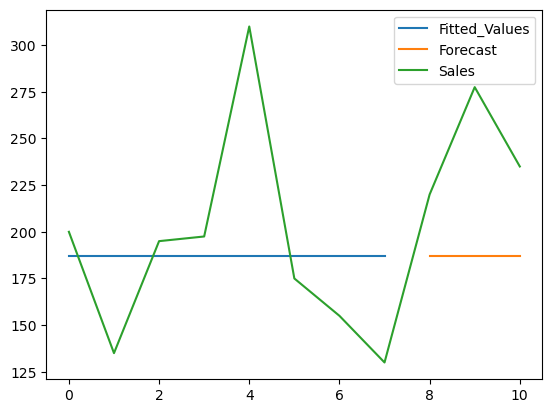

In [49]:
all.plot()

In [50]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(all["Sales"],all["Forecast"])

22.60013940122771

In [51]:
mp

{'smoothing_level': 0.1,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 200.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
mp=model.params
smoothing_level = list(mp.values())[0]
smoothing_level

1.4901161193847656e-08

In [53]:
model = SimpleExpSmoothing(df).fit(smoothing_level=smoothing_level)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,11
Model:,SimpleExpSmoothing,SSE,31455.682
Optimized:,True,AIC,91.543
Trend:,None,BIC,92.339
Seasonal:,None,AICC,98.210
Seasonal Periods:,None,Date:,"Sat, 16 Sep 2023"
Box-Cox:,False,Time:,23:47:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,False
initial_level,202.72727,l.0,True


In [54]:
forecast_future=model.forecast(4)
forecast_future

1990-01-12    202.727272
1990-01-13    202.727272
1990-01-14    202.727272
1990-01-15    202.727272
Freq: D, dtype: float64

In [55]:
df_graph=df.reset_index(drop=True)

The estimated and heuristic methods result in the same initial_level, this is not always the case

In [56]:
final=pd.concat([df_graph,forecast_future])
final.rename(columns = {0:'Forecasts'}, inplace = True)

In [57]:
final=final.reset_index(drop=True)

In [58]:
date_range = pd.date_range(start='1990-01-01', periods=15,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)
date_range_df
final=pd.concat([final,date_range_df],axis=1)
final=final.set_index("Date")

<AxesSubplot:xlabel='Date'>

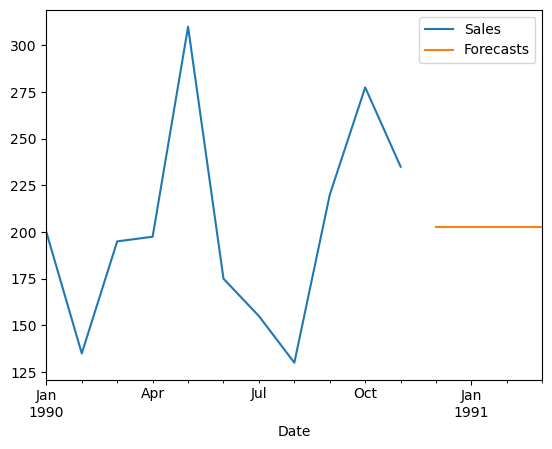

In [59]:
final.plot()